# Cristian Lorenzo
## Stage IV

# Original Data - Cases & Deaths

In [12]:
import pandas as pd
import numpy as np

file_path = "../Team/US-Covid.csv"
df = pd.read_csv(file_path)
df = df[df['State'] == 'NJ']

df  

,countyFIPS,County Name,State,StateFIPS,population,2020-06-01_cases,2020-06-02_cases,2020-06-03_cases,2020-06-04_cases,2020-06-05_cases,...,2020-12-25_deaths,2020-12-26_deaths,2020-12-27_deaths,2020-12-28_deaths,2020-12-29_deaths,2020-12-30_deaths,2020-12-31_deaths,2021-01-01_deaths,2021-01-02_deaths,2021-01-03_deaths
1774,34001,Atlantic County,NJ,34,263670,2222,2251,2284,2286,2309,...,355,357,360,359,364,366,368,370,372,372
1775,34003,Bergen County,NJ,34,932202,18302,18333,18376,18408,18463,...,2276,2277,2280,2282,2300,2312,2318,2330,2333,2335
1776,34005,Burlington County,NJ,34,445349,4657,4680,4700,4725,4746,...,606,606,606,606,610,620,624,627,629,630
1777,34007,Camden County,NJ,34,506471,6543,6603,6645,6663,6732,...,780,782,782,785,794,812,818,827,830,833
1778,34009,Cape May County,NJ,34,92039,623,628,629,630,637,...,132,132,132,132,133,134,135,137,137,137
1779,34011,Cumberland County,NJ,34,149527,2310,2345,2431,2469,2531,...,212,212,214,216,221,223,225,229,231,231
1780,34013,Essex County,NJ,34,798975,17695,17752,17811,17912,18019,...,2363,2364,2365,2367,2372,2385,2391,2399,2400,2403
1781,34015,Gloucester County,NJ,34,291636,2245,2262,2278,2290,2310,...,359,359,359,360,367,383,386,397,397,398
1782,34017,Hudson County,NJ,34,672391,18428,18455,18460,18465,18518,...,1677,1678,1679,1681,1687,1695,1699,1707,1711,1713
1783,34019,Hunterdon County,NJ,34,124371,996,999,1006,1009,1015,...,136,136,136,136,137,139,139,139,139,139


# Top 5 counties with most cases

In [13]:
columns_case = [col for col in df.columns if '_cases' in col]

county_cases = df[['County Name']].copy()
county_cases['Total Cases'] = df[columns_case].sum(axis=1)

top_counties = county_cases.sort_values(by='Total Cases', ascending=False).head(5)

top_counties

,County Name,Total Cases
1775,Bergen County,5579823
1780,Essex County,5454643
1782,Hudson County,5211610
1785,Middlesex County,4924266
1789,Passaic County,4771133


# Filtered data with only those counties

In [14]:
counties = ['Bergen County', 'Essex County', 'Hudson County', 'Middlesex County', 'Passaic County']

df['County Name'] = df['County Name'].str.strip()  
df_filtered = df[df['County Name'].isin(counties)]

df_filtered

,countyFIPS,County Name,State,StateFIPS,population,2020-06-01_cases,2020-06-02_cases,2020-06-03_cases,2020-06-04_cases,2020-06-05_cases,...,2020-12-25_deaths,2020-12-26_deaths,2020-12-27_deaths,2020-12-28_deaths,2020-12-29_deaths,2020-12-30_deaths,2020-12-31_deaths,2021-01-01_deaths,2021-01-02_deaths,2021-01-03_deaths
1775,34003,Bergen County,NJ,34,932202,18302,18333,18376,18408,18463,...,2276,2277,2280,2282,2300,2312,2318,2330,2333,2335
1780,34013,Essex County,NJ,34,798975,17695,17752,17811,17912,18019,...,2363,2364,2365,2367,2372,2385,2391,2399,2400,2403
1782,34017,Hudson County,NJ,34,672391,18428,18455,18460,18465,18518,...,1677,1678,1679,1681,1687,1695,1699,1707,1711,1713
1785,34023,Middlesex County,NJ,34,825062,15977,16021,16066,16072,16137,...,1628,1630,1632,1632,1650,1663,1677,1683,1685,1688
1789,34031,Passaic County,NJ,34,501826,16200,16234,16277,16311,16387,...,1426,1426,1426,1427,1435,1451,1458,1460,1462,1462


# Linear and Non-linear regression models to compare trends of cases and deaths for NJ counties

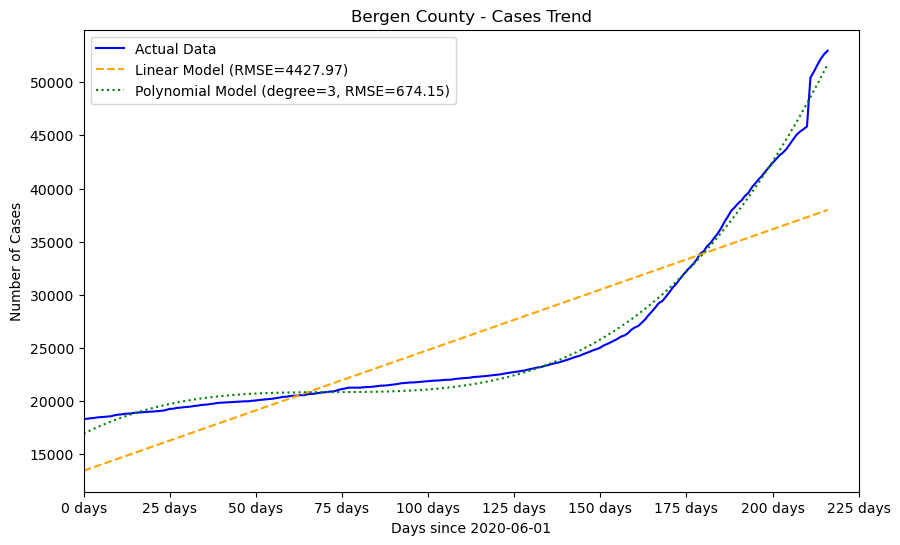

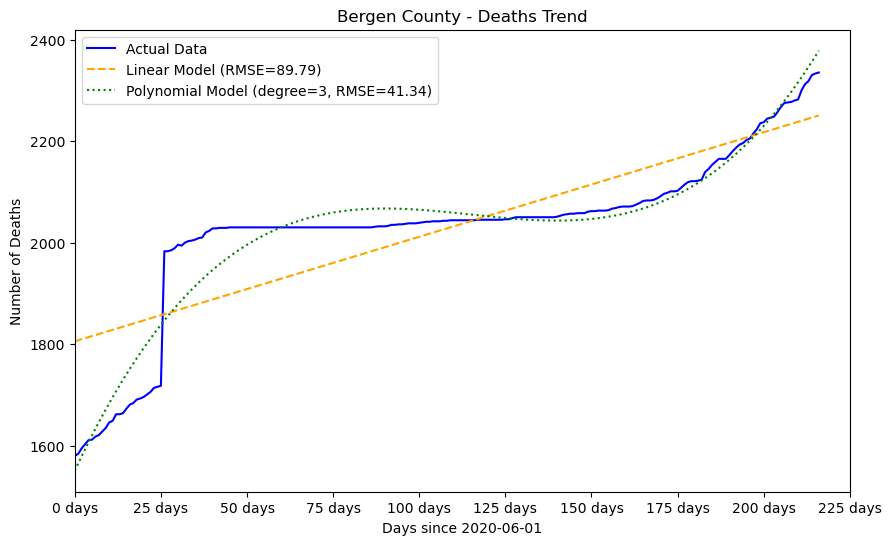

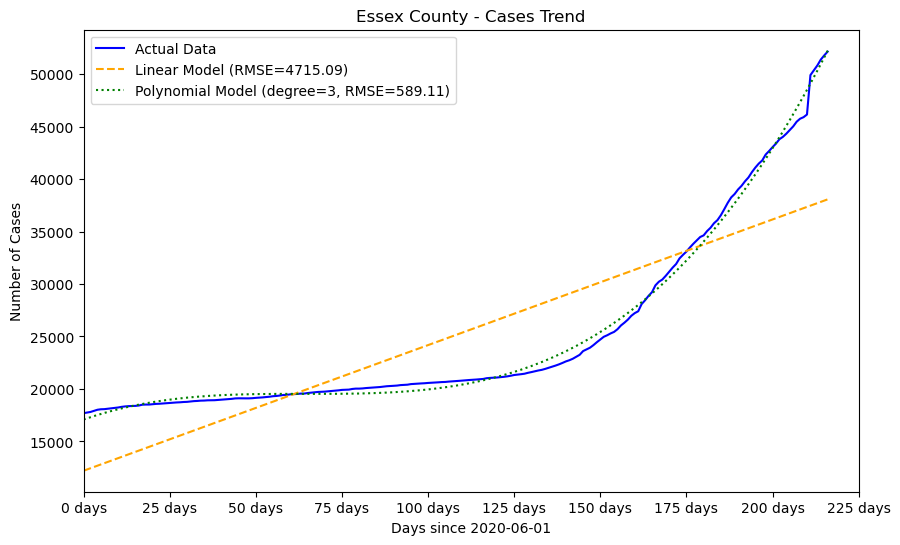

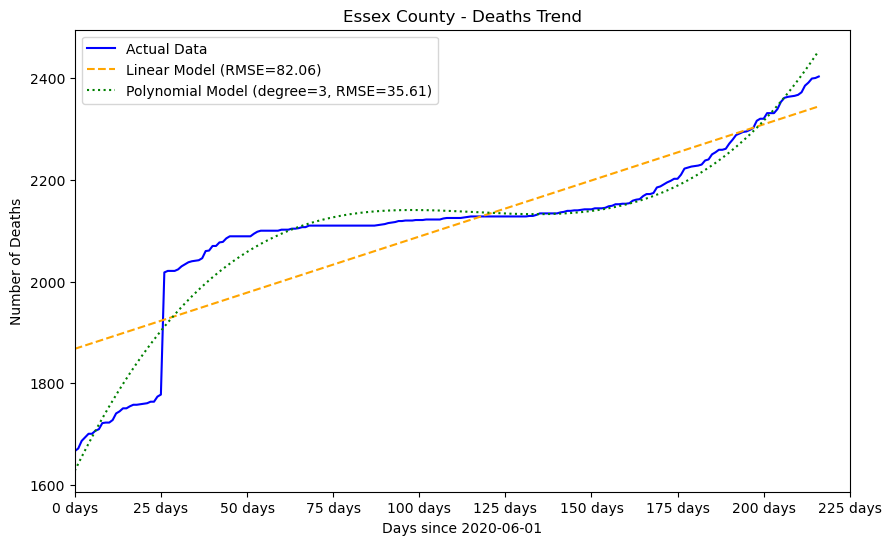

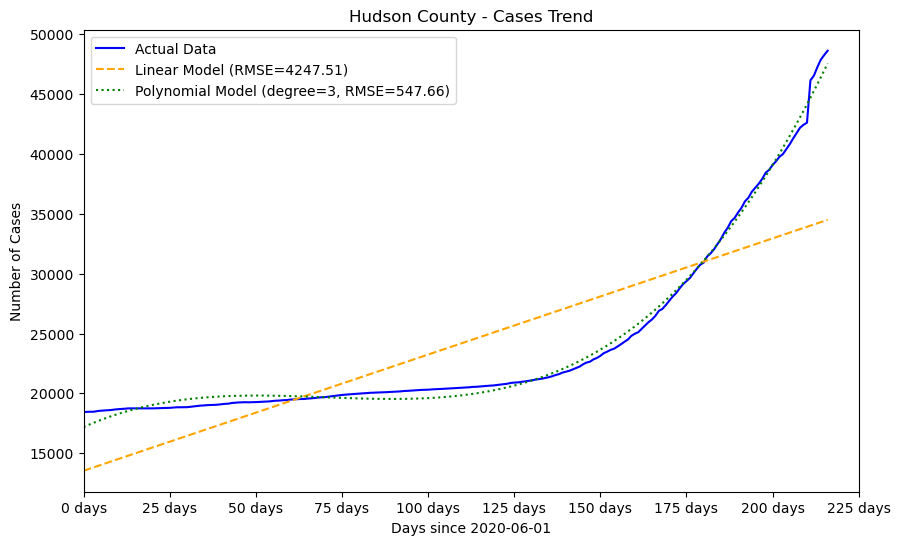

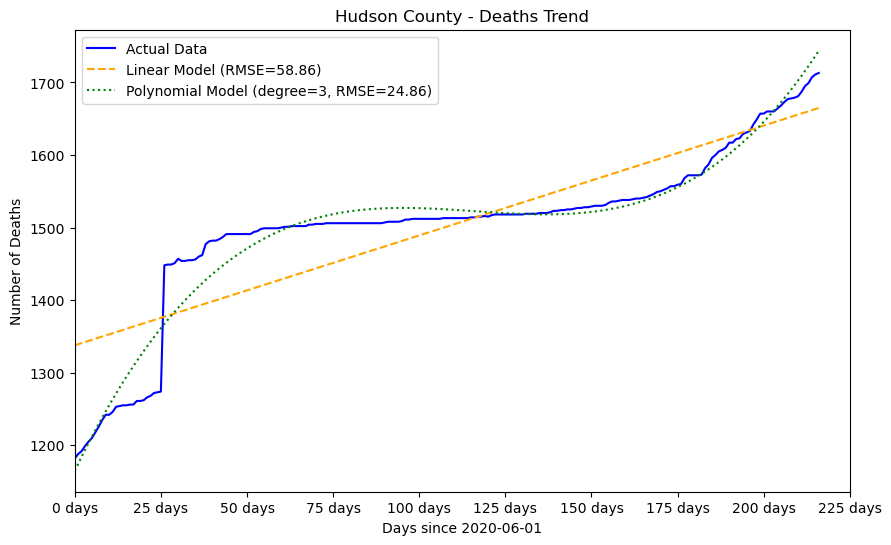

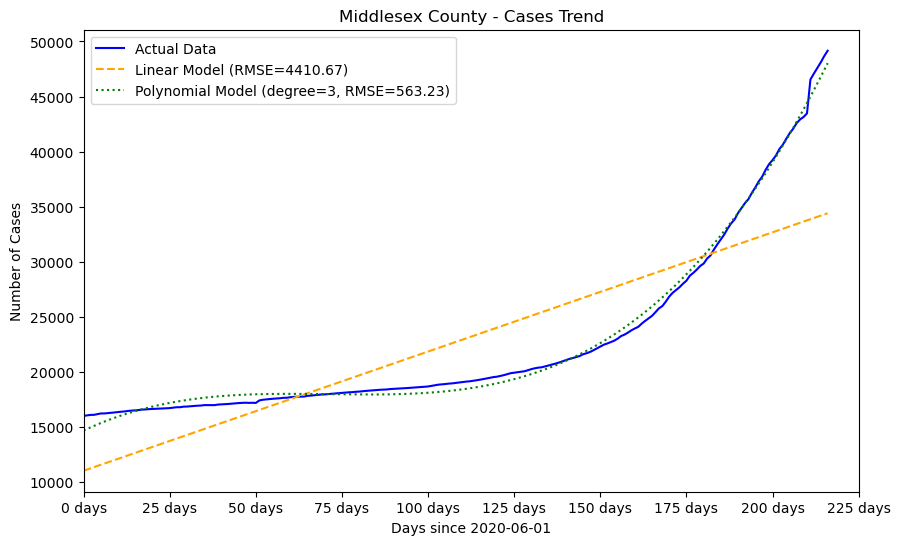

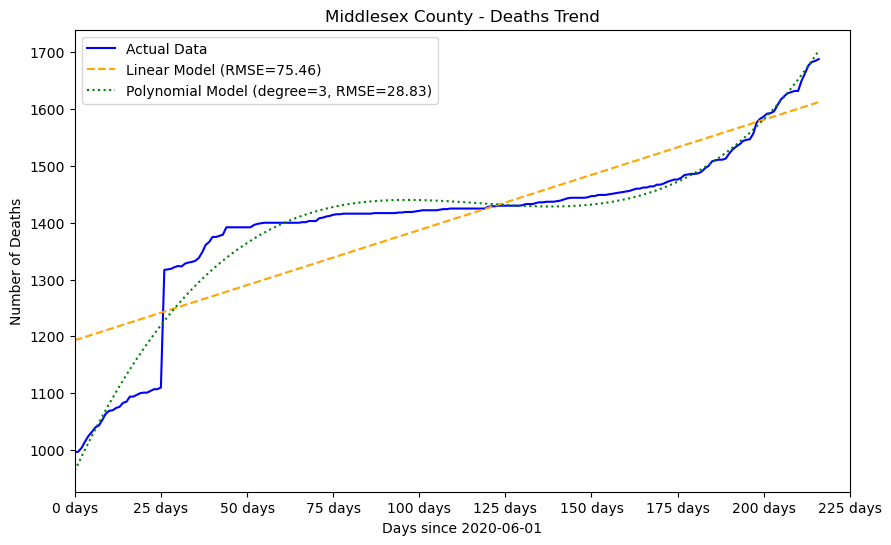

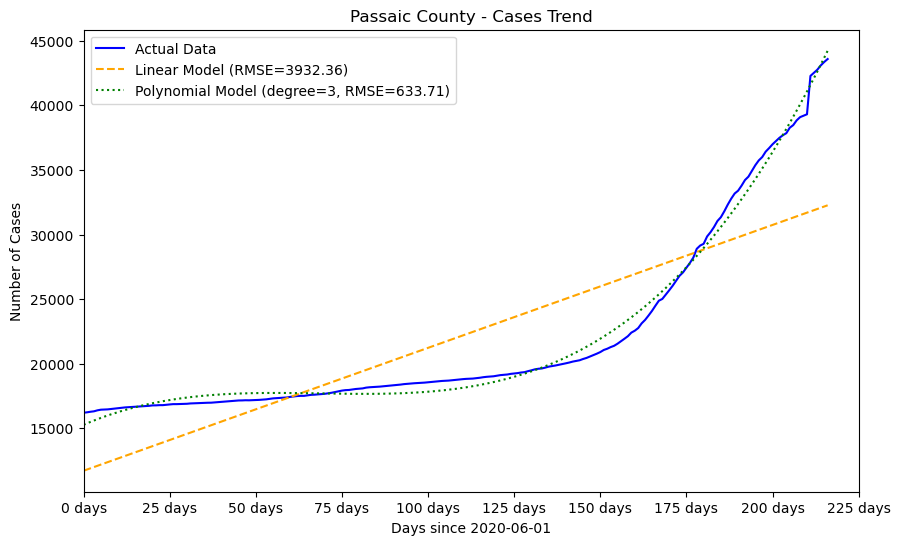

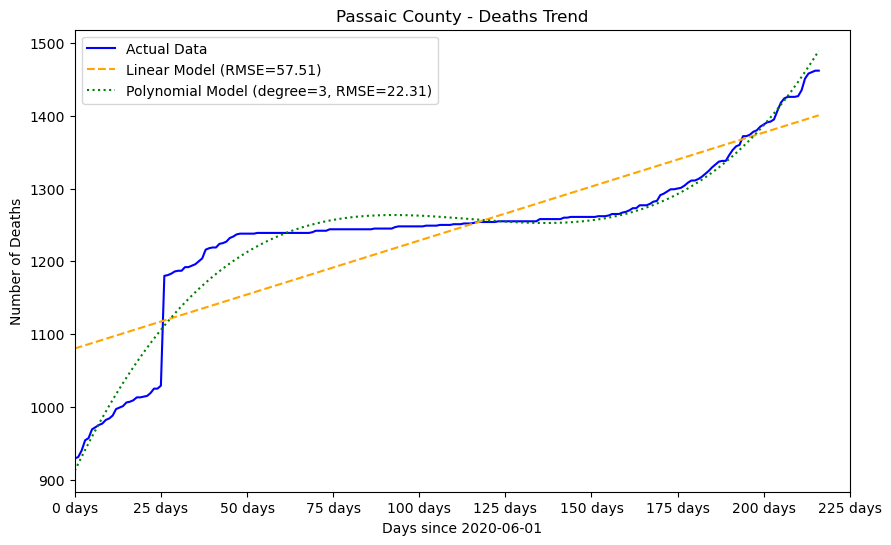

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

start_date = '2020-06-01'
end_date = '2021-01-03'

columns_case = [col for col in df_filtered.columns if '_cases' in col]
columns_deaths = [col for col in df_filtered.columns if '_deaths' in col]

dates = pd.to_datetime([col.split('_')[0] for col in columns_case])
days = (dates - dates.min()).days.values.reshape(-1,1)


def train_and_evaluate(county_data, county_name, feature_columns, degree):
    y_cases = county_data[feature_columns].values.flatten()
    
    linear_model = LinearRegression()
    linear_model.fit(days, y_cases)
    y_pred_linear = linear_model.predict(days)
    rmse_linear = np.sqrt(mean_squared_error(y_cases, y_pred_linear))
    
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_model.fit(days, y_cases)
    y_pred_poly = poly_model.predict(days)
    rmse_poly = np.sqrt(mean_squared_error(y_cases, y_pred_poly))
    
    plt.figure(figsize=(10, 6))
    plt.plot(days, y_cases, label="Actual Data", color='blue')
    plt.plot(days, y_pred_linear, label=f"Linear Model (RMSE={rmse_linear:.2f})", linestyle='--', color='orange')
    plt.plot(days, y_pred_poly, label=f"Polynomial Model (degree={degree}, RMSE={rmse_poly:.2f})", linestyle=':', color='green')
    plt.xlabel("Days since " + start_date)
    plt.ylabel("Number of Cases" if 'cases' in feature_columns[0] else "Number of Deaths")
    plt.title(f"{county_name} - {'Cases' if 'cases' in feature_columns[0] else 'Deaths'} Trend")
    
    plt.xlim(0, days.max())
    tick_values = plt.xticks()[0]
    tick_labels = [f"{int(tick)} days" for tick in tick_values]
    plt.xticks(tick_values, tick_labels)
    plt.legend()
    plt.show()
    
for county in counties:
    county_data = df_filtered[df_filtered['County Name'] == county]
    
    train_and_evaluate(county_data, county, columns_case, degree=3)
    
    # fix the deaths
    train_and_evaluate(county_data, county, columns_deaths, degree=3)

# I then merged my NJ_Cases dataframe with my demographic data frame into 'NJ_County_Demographic'

In [5]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency

# Data Set
file_path = 'NJ_County_Demographic.csv'
data = pd.read_csv(file_path)
data

,countyFIPS,County Name,State,StateFIPS,population,2020-06-01_cases,2020-06-02_cases,2020-06-03_cases,2020-06-04_cases,2020-06-05_cases,...,Estimate SEX AND AGE Total population 21 years and over,Estimate SEX AND AGE Total population 62 years and over,Estimate SEX AND AGE Total population 65 years and over,Estimate RACE Total population One race White,Estimate RACE Total population One race Black or African American,Estimate RACE Total population One race American Indian and Alaska Native,Estimate RACE Total population One race Asian,Estimate RACE Total population One race Native Hawaiian and Other Pacific Islander,Estimate RACE Total population One race Some other race,Estimate HISPANIC OR LATINO AND RACE Total population Hispanic or Latino (of any race)
0,34003,Bergen County,NJ,34,932202,18302,18333,18376,18408,18463,...,702856,195820,161217,642742,54347,1904,153970,314,29561,189827
1,34013,Essex County,NJ,34,798975,17695,17752,17811,17912,18019,...,578612,135807,109354,328493,313839,2116,43682,324,67473,185818
2,34017,Hudson County,NJ,34,672391,18428,18455,18460,18465,18518,...,515692,98922,80389,338748,81178,3274,105812,379,89283,286039
3,34023,Middlesex County,NJ,34,825062,15977,16021,16066,16072,16137,...,607700,152814,124295,452827,84952,2286,202163,393,44131,176010
4,34031,Passaic County,NJ,34,501826,16200,16234,16277,16311,16387,...,361706,90284,73469,304588,56028,1501,26981,192,78338,210461


# Columns for the demographic information

In [6]:
# Columns for COVID-19 cases and demographic information
covid_cases_cols = [col for col in data.columns if '_cases' in col]
sex_male_col = 'Estimate  SEX AND AGE  Total population  Male'
sex_female_col = 'Estimate  SEX AND AGE  Total population  Female'
age_under_18_col = 'Estimate  SEX AND AGE  Total population  Under 18 years'
race_white_col = 'Estimate  RACE  Total population  One race  White'
race_black_col = 'Estimate  RACE  Total population  One race  Black or African American'
race_hispanic_col = 'Estimate  HISPANIC OR LATINO AND RACE  Total population  Hispanic or Latino (of any race)'

# Filter rows with missing values in these columns
filtered_data = data.dropna(subset=[*covid_cases_cols, sex_male_col, sex_female_col, age_under_18_col, 
                                    race_white_col, race_black_col, race_hispanic_col])

# Calculate total COVID-19 cases per county across the available dates
filtered_data['total_cases'] = filtered_data[covid_cases_cols].sum(axis=1)

# Creating proportion columns for age demographic
filtered_data['prop_under_18'] = filtered_data[age_under_18_col] / filtered_data['population']
filtered_data['prop_male'] = filtered_data[sex_male_col] / filtered_data['population']
filtered_data['prop_female'] = filtered_data[sex_female_col] / filtered_data['population']

### Hypothesis 1: Young population and COVID-19 Spread
* Counties with a higher proportion of younger populations experience a faster spread of COVID-19 cases​

In [7]:
# Split the data into high and low proportion of young populations
young_pop_high = filtered_data[filtered_data['prop_under_18'] > filtered_data['prop_under_18'].median()]['total_cases']
young_pop_low = filtered_data[filtered_data['prop_under_18'] <= filtered_data['prop_under_18'].median()]['total_cases']

# Perform two-sample t-test
t_stat_young, p_val_young = ttest_ind(young_pop_high, young_pop_low, equal_var=False)

### Hypothesis 2: Gender and COVID-19 Cases
* The number of cases in a county is influenced by the proportion of male v female residents​

In [8]:
# Split data into high and low proportions of male population
male_high = filtered_data[filtered_data['prop_male'] > filtered_data['prop_male'].median()]['total_cases']
male_low = filtered_data[filtered_data['prop_male'] <= filtered_data['prop_male'].median()]['total_cases']

# Perform two-sample t-test
t_stat_gender, p_val_gender = ttest_ind(male_high, male_low, equal_var=False)

### Hypothesis 3: Racial composition and COVID-19 cases
* COVID-19 case numbers are correlated with a size of various racial groups within counties

In [9]:
# Create a table to test association between race and COVID-19 cases
race_data = filtered_data[[race_white_col, race_black_col, race_hispanic_col, 'total_cases']].copy()  # explicit copy
race_data.loc[:, 'cases_group'] = pd.qcut(race_data['total_cases'], q=2, labels=['Low Cases', 'High Cases'])
race_contingency_table = pd.crosstab(race_data['cases_group'], [race_data[race_white_col] > race_data[race_white_col].median(),
                                                                race_data[race_black_col] > race_data[race_black_col].median(),
                                                                race_data[race_hispanic_col] > race_data[race_hispanic_col].median()])

# Perform chi-square test
chi2_stat, p_val_race, _, _ = chi2_contingency(race_contingency_table)

### Results from hypothesis

In [10]:
# Display results
print("Young Population Hypothesis Test:")
print(f"T-statistic: {t_stat_young}, P-value: {p_val_young}")

print("\nGender Proportion Hypothesis Test:")
print(f"T-statistic: {t_stat_gender}, P-value: {p_val_gender}")

print("\nRacial Composition Hypothesis Test:")
print(f"Chi-square statistic: {chi2_stat}, P-value: {p_val_race}")

Young Population Hypothesis Test:
T-statistic: -0.3215225565602876, P-value: 0.7841743815236781

Gender Proportion Hypothesis Test:
T-statistic: -0.6929473624988491, P-value: 0.5397217134623943

Racial Composition Hypothesis Test:
Chi-square statistic: 5.0, P-value: 0.1717971442967335


The data suggests there does not appear to be influenced by these demographic factors

For both the t-statistic for young population and gender proportion suggests that the mean for these demographics is slightly lower to the demographic that is it being compared. 

The 3rd hypothesis was the closes to have any association with COVID-19 cases

Overall we fail to reject the null hypothesis for all three hypothesis, the high p-values suggest that there's not enough evidence to support any significant relationship between COVID-19 case counts. 

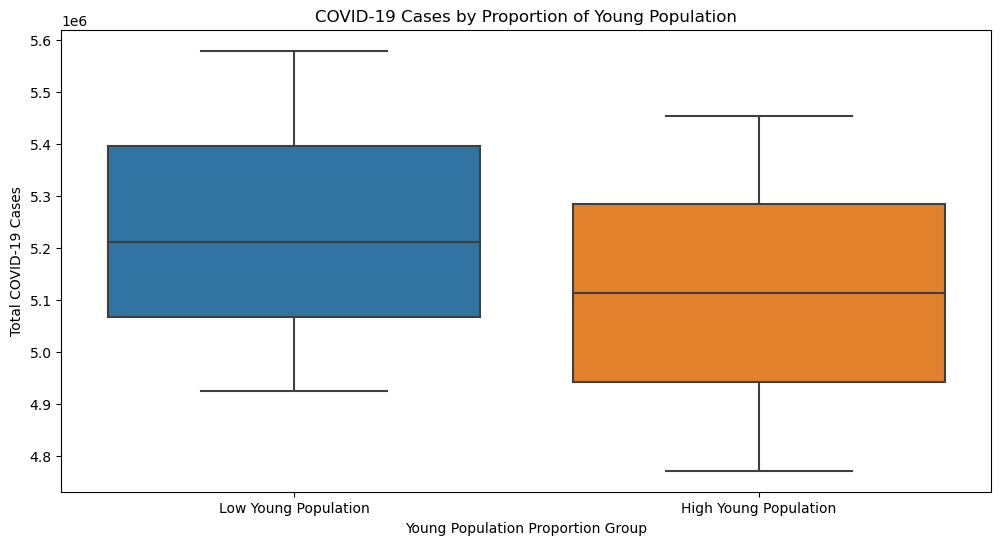

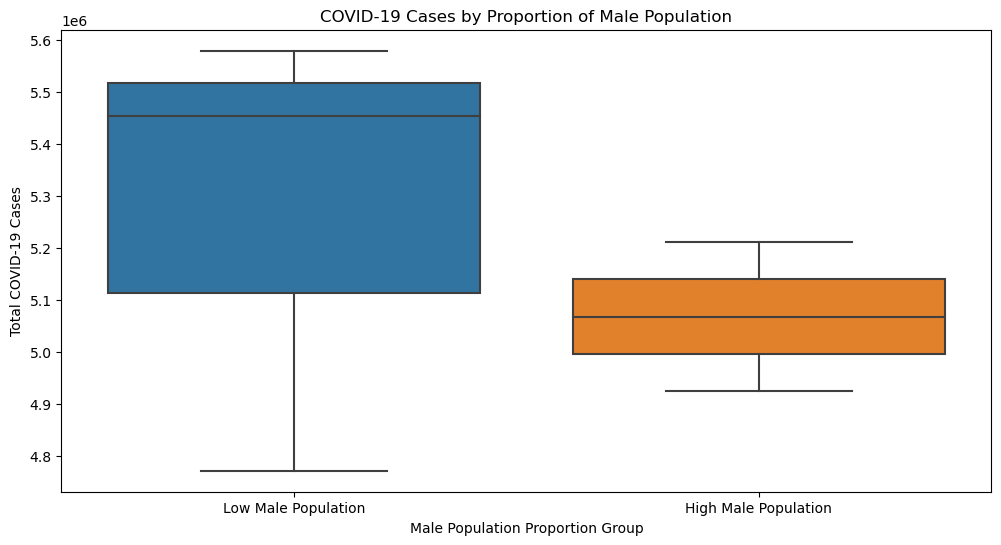

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Young Population vs COVID-19 Cases Visualization
plt.figure(figsize=(12, 6))

# Creating a box plot for COVID-19 cases grouped by high and low proportion of young population
sns.boxplot(data=filtered_data, 
            x=pd.cut(filtered_data['prop_under_18'], bins=[0, filtered_data['prop_under_18'].median(), 1], labels=['Low Young Population', 'High Young Population']), 
            y='total_cases')
plt.title('COVID-19 Cases by Proportion of Young Population')
plt.ylabel('Total COVID-19 Cases')
plt.xlabel('Young Population Proportion Group')
plt.show()

# Gender Proportion vs COVID-19 Cases Visualization
plt.figure(figsize=(12, 6))

# Creating a box plot for COVID-19 cases grouped by high and low proportion of male population
sns.boxplot(data=filtered_data, 
            x=pd.cut(filtered_data['prop_male'], bins=[0, filtered_data['prop_male'].median(), 1], labels=['Low Male Population', 'High Male Population']), 
            y='total_cases')
plt.title('COVID-19 Cases by Proportion of Male Population')
plt.ylabel('Total COVID-19 Cases')
plt.xlabel('Male Population Proportion Group')
plt.show()
